In [1]:
#%load_ext autoreload
#%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset_ll_1129 import Dataset

import rulevetting
import os
from os.path import join as oj

outcome_def = 'outcome'  # output
%matplotlib inline
#%load_ext autoreload
#%autoreload 2

/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-env/lib/python3.8/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


In [2]:
df_train, df_tune, df_test = Dataset().get_data(save_csvs=True)

# SH: I have already done it. You can find datasets in "data/csi_pecarn/processed"
# SH: However, after Licong finish the other part of data cleaning, we need to re-run this.
df_train, df_tune, df_test = Dataset().get_data(load_csvs=True)
df = df_train
processed_feats = df.keys().values.tolist()
print(df_train.shape[0] + df_tune.shape[0] + df_test.shape[0], len(processed_feats))
print(processed_feats)
print(df.shape,'df.shape')


kwargs {'clean_data': {}, 'preprocess_data': {'frac_missing_allowed': 0.15}, 'extract_features': {'drop_negative_columns': False}}
read all the csvs... ['analysisvariables.csv', 'clinicalpresentationfield.csv', 'clinicalpresentationoutside.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injuryclassification.csv', 'injurymechanism.csv', 'kappa.csv', 'medicalhistory.csv', 'radiologyoutside.csv', 'radiologyreview.csv', 'radiologysite.csv']


100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 68.61it/s]


merge all the dfs... ['analysisvariables.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injurymechanism.csv']


4it [00:00, 10.52it/s]
/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-env/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-vetting/rulevetting/projects/csi_pecarn/dataset_ll_1129.py:136: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


1600 52
['AVPU', 'AlteredMentalStatus', 'ArrPtIntub', 'AxialLoadAnyDoc', 'CervicalSpineImmobilization', 'DxCspineInjury', 'FocalNeuroFindings', 'HeadFirst', 'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'IntervForCervicalStab', 'LOC', 'LimitedRangeMotion', 'LongTermRehab', 'Predisposed', 'MedsGiven', 'MedsRecdPriorArrival', 'PainNeck', 'PainNeck2', 'PosMidNeckTenderness', 'PosMidNeckTenderness2', 'PtAmbulatoryPriorArrival', 'PtCompPain', 'PtCompPainHead', 'PtCompPainNeck', 'PtCompPainPelvis', 'PtExtremityWeakness', 'PtParesthesias', 'PtSensoryLoss', 'PtTender', 'PtTenderAbd', 'PtTenderBack', 'PtTenderChest', 'PtTenderExt', 'PtTenderFlank', 'PtTenderHead', 'PtTenderNeck', 'PtTenderPelvis', 'SubInj_Ext', 'SubInj_Face', 'SubInj_Head', 'SubInj_TorsoTrunk', 'TenderNeck', 'Torticollis', 'TotalGCS', 'ambulatory', 'axialloadtop', 'outcome']
(960, 52) df.shape


## df : the dataframe we are going to use for our prediction  

In [3]:


df_ll=df

df_ll=df_ll.drop(columns=['PosMidNeckTenderness2','PainNeck2','PtAmbulatoryPriorArrival','HeadFirst','PtCompPainNeck',
                         'PtTenderNeck','TotalGCS'])


df_ll2=df_ll[['AlteredMentalStatus','LOC','ambulatory','FocalNeuroFindings','PainNeck','PosMidNeckTenderness',
'TenderNeck','Torticollis','SubInj_Head','SubInj_Face','SubInj_Ext','SubInj_TorsoTrunk',
'Predisposed','HighriskDiving','HighriskFall','HighriskHanging','HighriskHitByCar','HighriskMVC',
'HighriskOtherMV','AxialLoadAnyDoc','axialloadtop','outcome']]

 
print(df_ll.columns)





Index(['AVPU', 'AlteredMentalStatus', 'ArrPtIntub', 'AxialLoadAnyDoc',
       'CervicalSpineImmobilization', 'DxCspineInjury', 'FocalNeuroFindings',
       'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar',
       'HighriskMVC', 'HighriskOtherMV', 'IntervForCervicalStab', 'LOC',
       'LimitedRangeMotion', 'LongTermRehab', 'Predisposed', 'MedsGiven',
       'MedsRecdPriorArrival', 'PainNeck', 'PosMidNeckTenderness',
       'PtCompPain', 'PtCompPainHead', 'PtCompPainPelvis',
       'PtExtremityWeakness', 'PtParesthesias', 'PtSensoryLoss', 'PtTender',
       'PtTenderAbd', 'PtTenderBack', 'PtTenderChest', 'PtTenderExt',
       'PtTenderFlank', 'PtTenderHead', 'PtTenderPelvis', 'SubInj_Ext',
       'SubInj_Face', 'SubInj_Head', 'SubInj_TorsoTrunk', 'TenderNeck',
       'Torticollis', 'ambulatory', 'axialloadtop', 'outcome'],
      dtype='object')


## meta_df : the data that is important but not going to be used in our prediction
`["SubjectID", "SiteID", "CaseID", "Ethnicity", "Gender"]`

In [4]:
PROCESSED_PATH = oj(rulevetting.DATA_PATH, Dataset().get_dataset_id(), 'processed')
meta_df = pd.read_csv(oj(PROCESSED_PATH, "meta_train.csv"), index_col=0)
print(meta_df.shape)
meta_df.head()

(960, 6)


,CaseID,ControlType,Ethnicity,Gender,SiteID,SubjectID
1097,710892,ran,H,M,7,741098
706,610707,case,ND,F,6,610707
392,310299,ran,ND,M,3,340393
278,310279,case,ND,F,3,310279
2012,1111844,ran,ND,F,11,1142013


### Check the types of all columns

In [5]:
#print(df.dtypes)
dc = {}
for t in df_ll.dtypes:
    if t in dc.keys(): dc[t] = dc[t] +1
    else: dc[t] = 1
print(dc)

{dtype('float64'): 33, dtype('int64'): 12}


## Corr. heatmap

In [6]:
newdf = df_ll
print(len(newdf.columns))
corrs = newdf.corr(method='pearson')
print(corrs.shape)
print(corrs.isna().sum().sum())

45
(45, 45)
0


In [7]:
newdf = newdf.fillna(df.median(numeric_only = True)) 
corrs = newdf.corr(method='pearson')

* Normal (Chandan's)

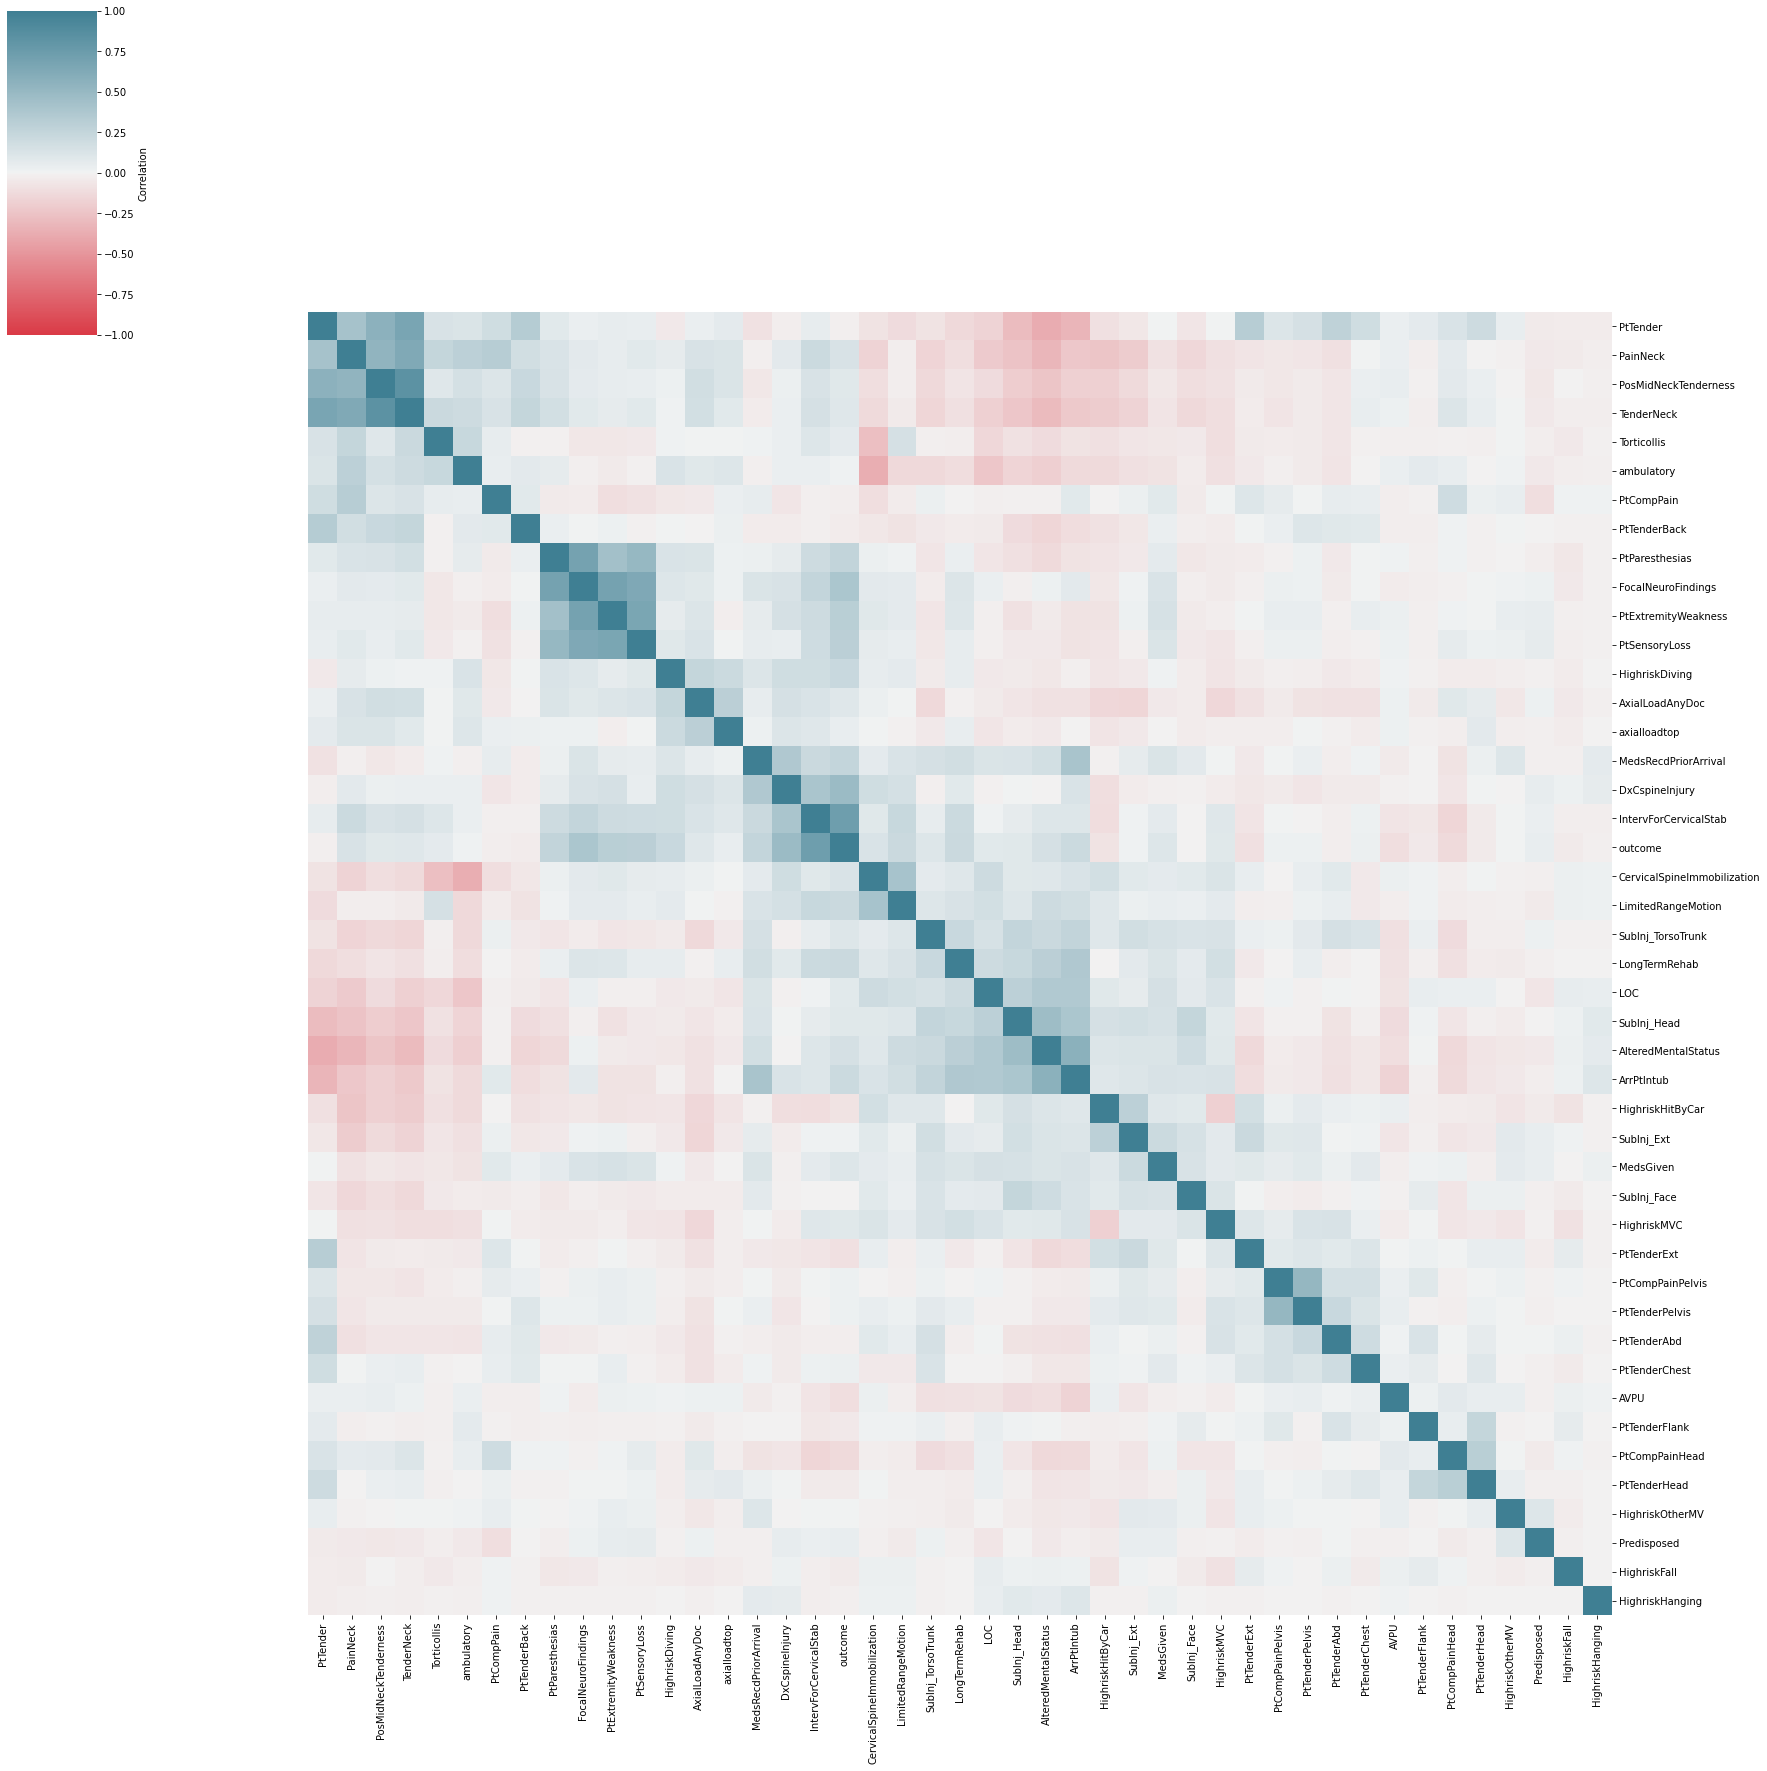

In [9]:
corrmap = sns.clustermap(corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, yticklabels=True, figsize=(25, 25))
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.savefig("corr-map.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None)

* Absoulte value version  
You can see most of the variables have abs(corr.) less than 0.5

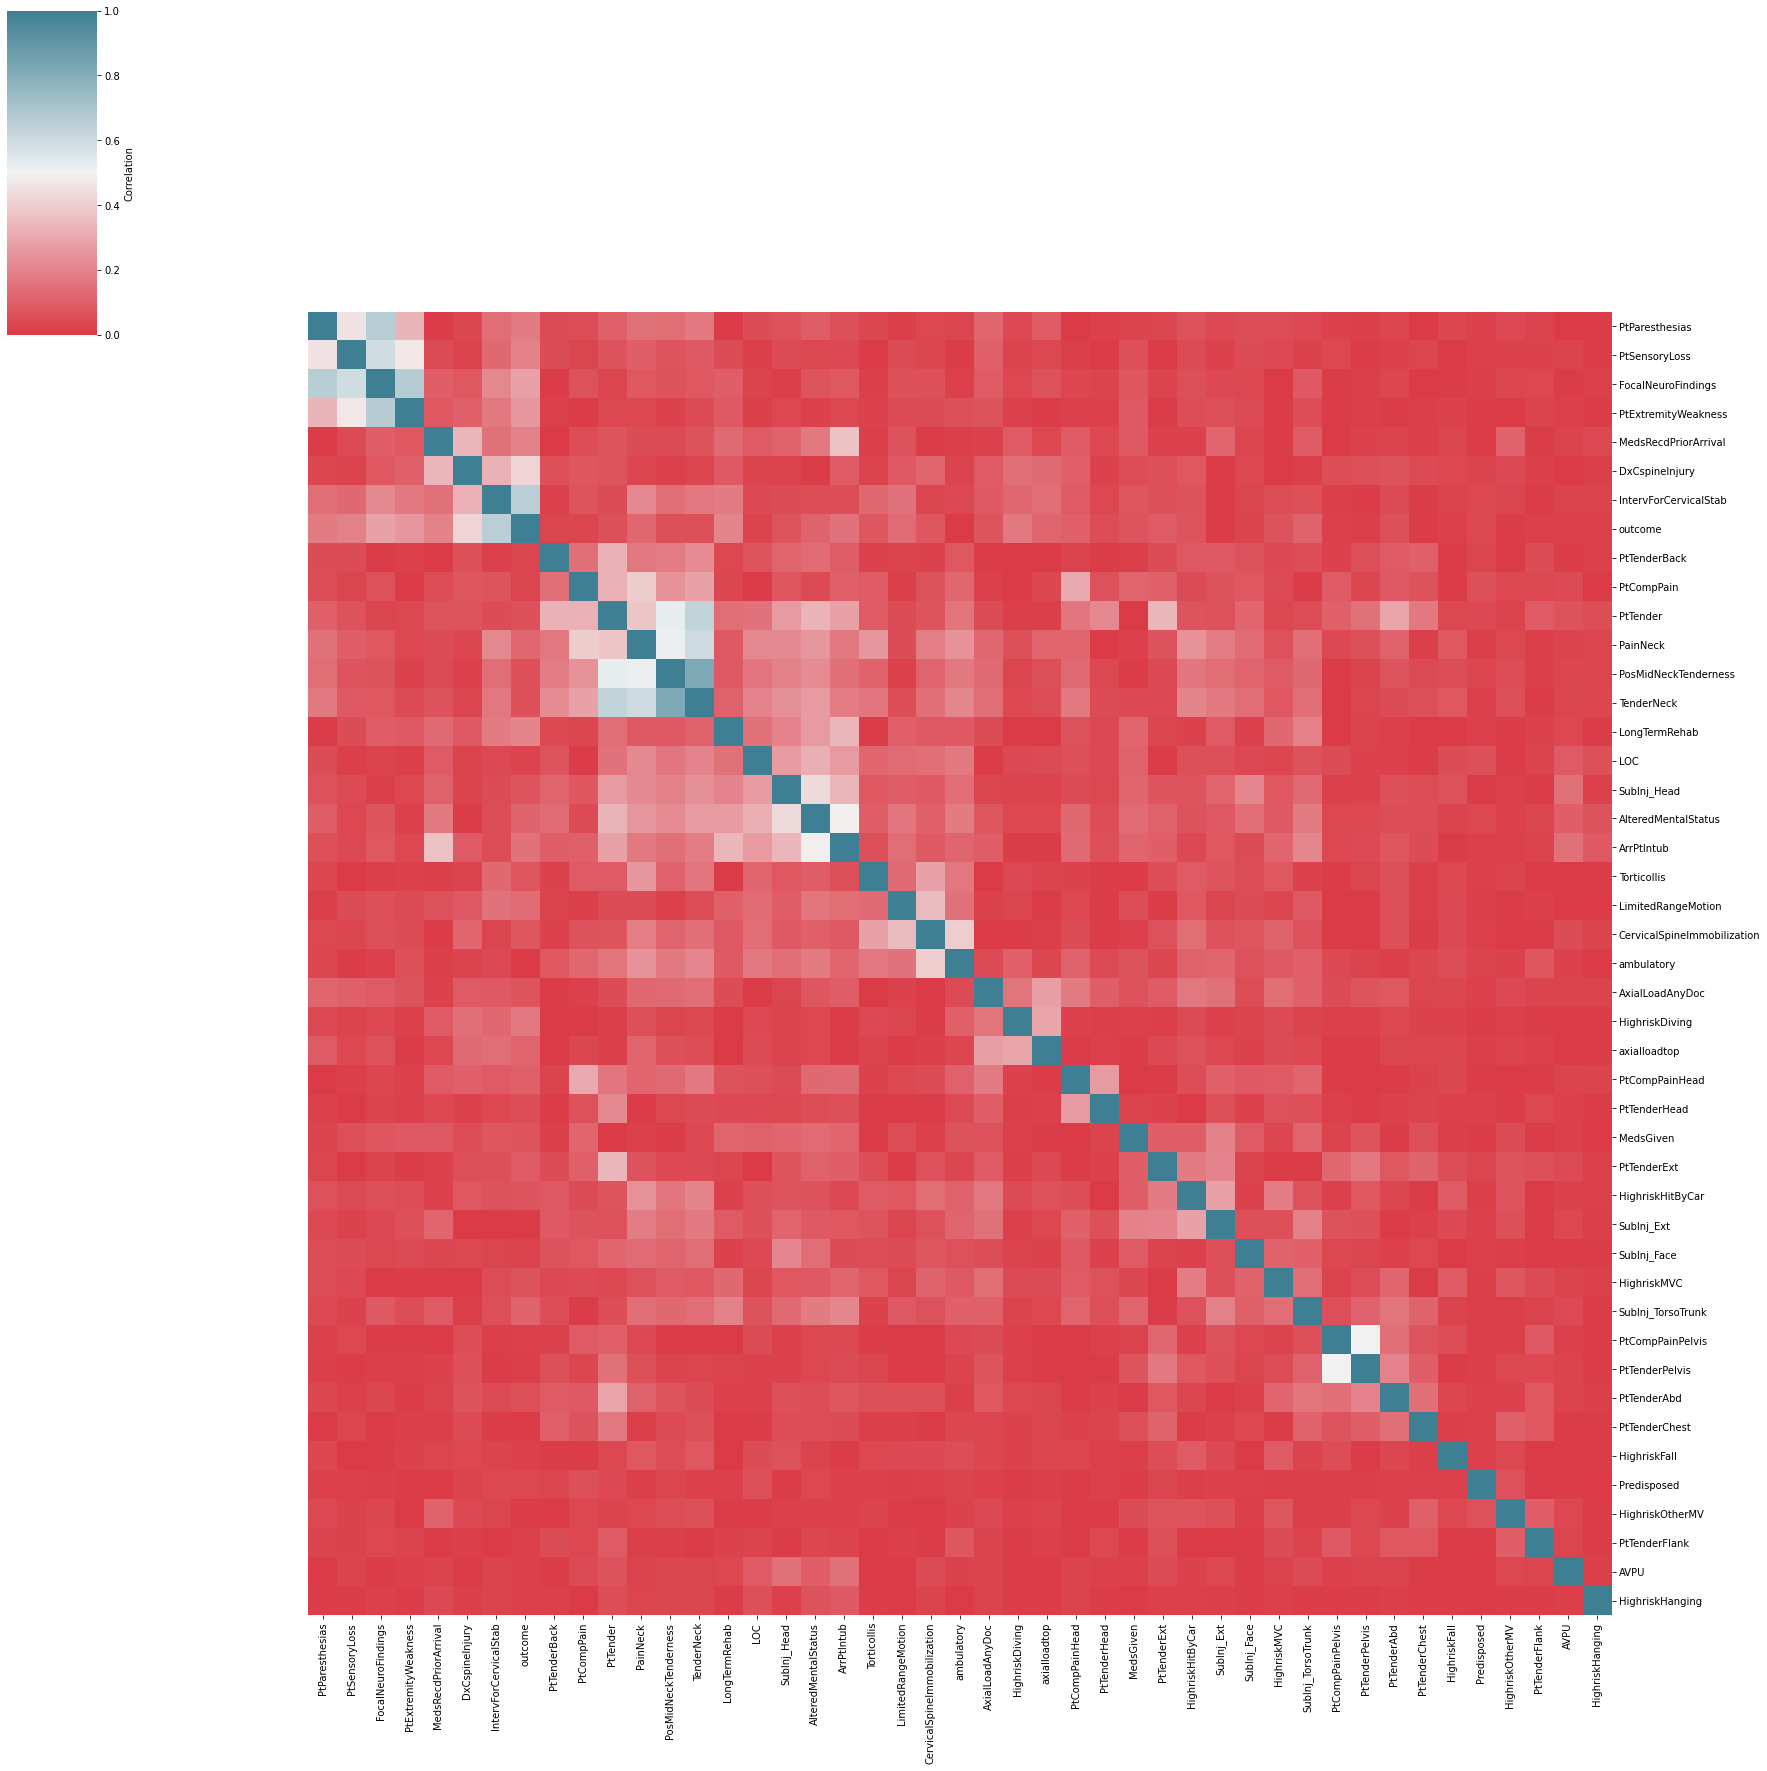

In [24]:
corrmap_abs = sns.clustermap(abs(corrs), cmap=viz.cmap_div, vmin=0, vmax=1, cbar_kws={'label': 'Correlation'}, yticklabels=True, figsize=(25, 25))
corrmap_abs.ax_row_dendrogram.set_visible(False)
corrmap_abs.ax_col_dendrogram.set_visible(False)

### now we start to select variables

In [25]:
outcome_def = 'outcome'

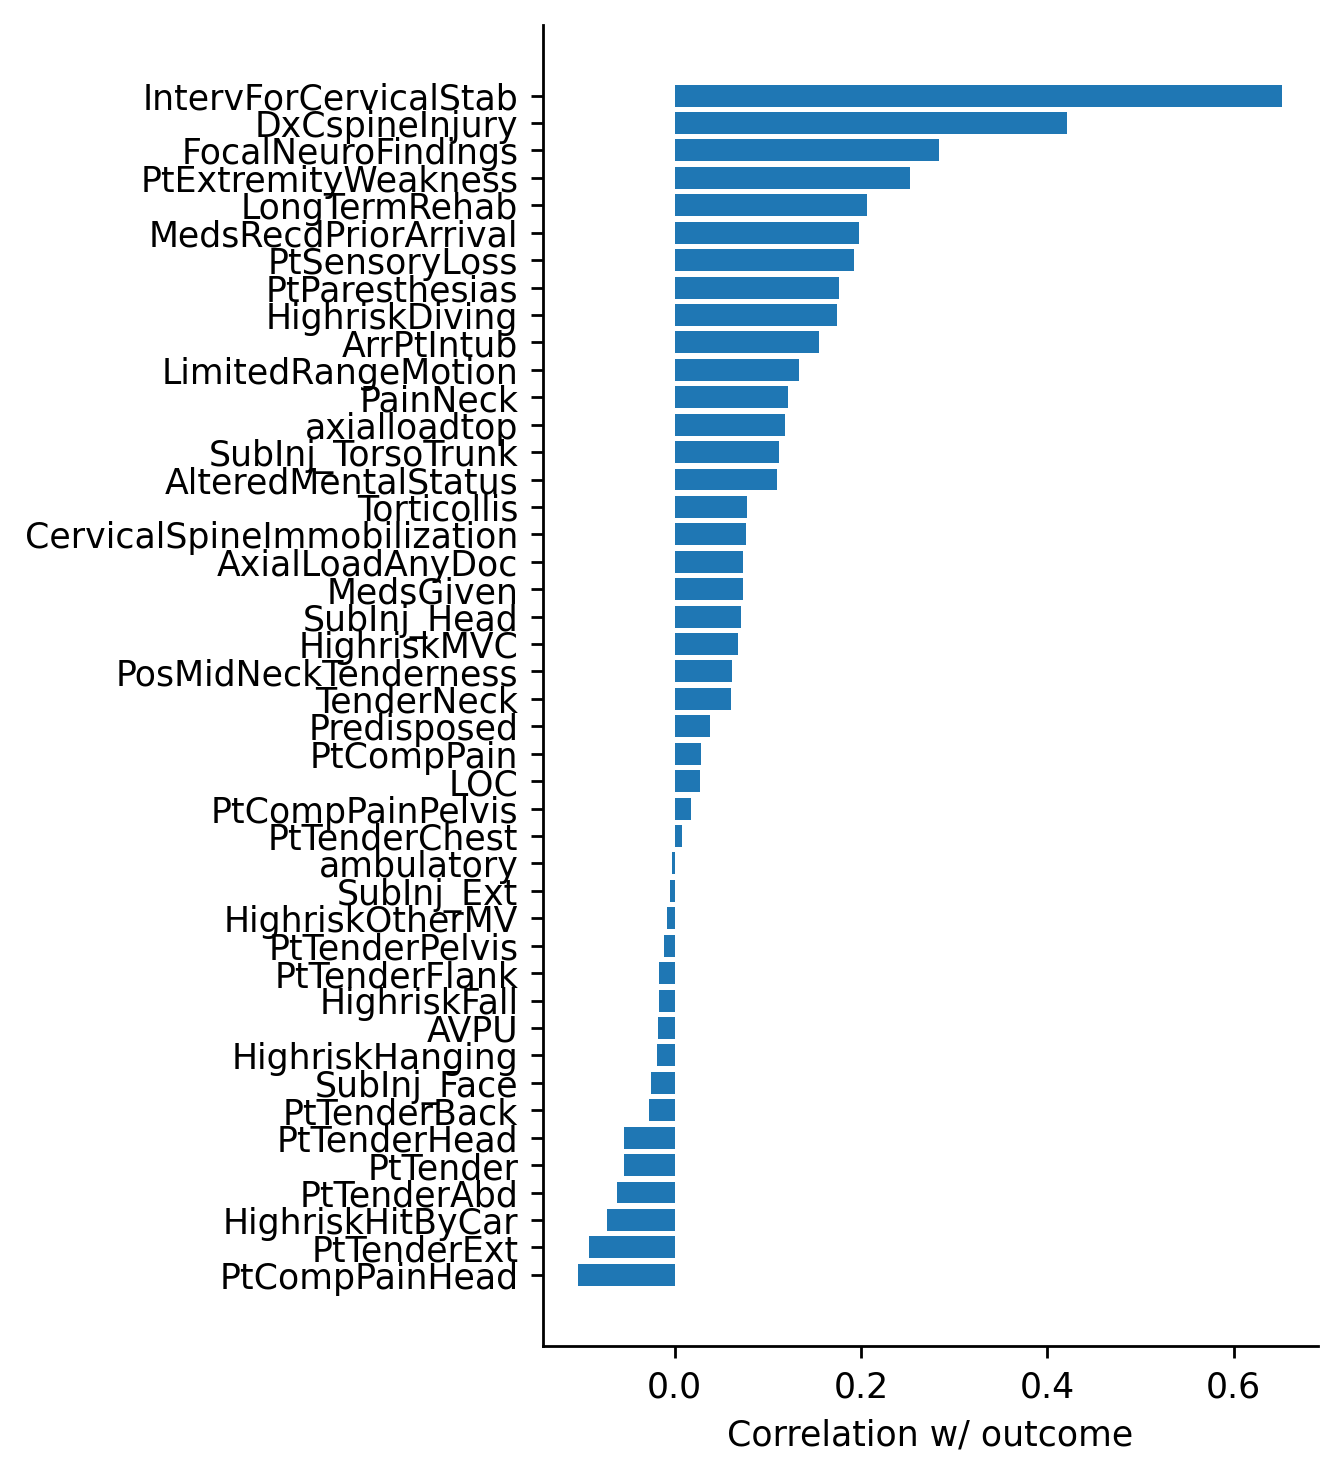

In [30]:
plt.figure(dpi=250, figsize=(4, 7))
vals = corrs[outcome_def]
vals.head()
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("out-corr.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None)
plt.show()

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [28]:
def var_selection(df,method=['rfe',10]):   ## input: a dataframe with outcome as the last column, method: ['rfe',number of
    ## features to choose] or ['lasso',penalty]     output: a dataframe containing the columns we select and the outcome column
    algo=method[0]
    param=method[1]
    X=df.drop(columns=['outcome'])
    y=df.outcome
    if algo=='rfe':
        mymodel=LogisticRegression()
        myrfe = RFE(mymodel,n_features_to_select=param)
        myfit = myrfe.fit(X, y)
        index=np.append(myfit.support_,True)
    
    elif algo=='lasso':
        mylasso = LogisticRegression(penalty='l1', solver='liblinear',C=param)   ## for example C=0.1
        myfit=mylasso.fit(X, y)
        
        index=np.append(myfit.coef_[0]!=0,True)
    
    
    return index
        
        
    

## example
print(df_ll.loc[:,var_selection(df_ll,method=['lasso',0.1])].columns)
        
    






Index(['AlteredMentalStatus', 'ArrPtIntub', 'DxCspineInjury',
       'FocalNeuroFindings', 'IntervForCervicalStab', 'PtExtremityWeakness',
       'PtTender', 'outcome'],
      dtype='object')


In [29]:
'''
print("Num Features: %s" % (ll_fit.n_features_))
print("Selected Features: %s" % (ll_fit.support_))
print("Feature Ranking: %s" % (ll_fit.ranking_))
for i in range(len(ll_X.columns)):
   
    if ll_fit.support_[i]== True:
        
        print(ll_X.columns[i])
'''

'\nprint("Num Features: %s" % (ll_fit.n_features_))\nprint("Selected Features: %s" % (ll_fit.support_))\nprint("Feature Ranking: %s" % (ll_fit.ranking_))\nfor i in range(len(ll_X.columns)):\n   \n    if ll_fit.support_[i]== True:\n        \n        print(ll_X.columns[i])\n'

## ------------------Here is the end of Licong's progress 11/30---------------------

In [14]:
data_path: str = rulevetting.DATA_PATH
raw_data_path = oj(data_path, "csi_pecarn", 'raw')

fnames = sorted([
    fname for fname in os.listdir(raw_data_path)
    if 'csv' in fname
    #   and not 'radiology' in fname
    #   and not 'kappa' in fname
    ])  # remove outcome (SH: not yet)

r = {}
print('read all the csvs...', fnames)
if len(fnames) == 0:
    print('no csvs found in path', raw_data_path)
for fname in tqdm(fnames):
    df = pd.read_csv(oj(raw_data_path, fname), encoding="ISO-8859-1")
    df.rename(columns={'site': 'SiteID'}, inplace=True)
    df.rename(columns={'SITE': 'SiteID'}, inplace=True)
    df.rename(columns={'caseid': 'CaseID'}, inplace=True)
    df.rename(columns={'controltype': 'ControlType'}, inplace=True)
    df.rename(columns={'studysubjectid': 'SubjectID'}, inplace=True)
    df.rename(columns={'StudySubjectID': 'SubjectID'}, inplace=True)
    assert ('SiteID' in df.keys())
    assert ('CaseID' in df.keys())
    assert ('ControlType' in df.keys())
    assert ('SubjectID' in df.keys())
    r[fname] = df

read all the csvs... ['analysisvariables.csv', 'clinicalpresentationfield.csv', 'clinicalpresentationoutside.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injuryclassification.csv', 'injurymechanism.csv', 'kappa.csv', 'medicalhistory.csv', 'radiologyoutside.csv', 'radiologyreview.csv', 'radiologysite.csv']


100%|█████████████████████████████████████████████████████| 12/12 [00:00<00:00, 83.54it/s]


In [15]:
print(r.keys())
for fname in fnames:
    df = r[fname]
    print(f'{fname:>35}', df.shape)

dict_keys(['analysisvariables.csv', 'clinicalpresentationfield.csv', 'clinicalpresentationoutside.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injuryclassification.csv', 'injurymechanism.csv', 'kappa.csv', 'medicalhistory.csv', 'radiologyoutside.csv', 'radiologyreview.csv', 'radiologysite.csv'])
              analysisvariables.csv (3314, 36)
      clinicalpresentationfield.csv (3314, 101)
    clinicalpresentationoutside.csv (3314, 114)
       clinicalpresentationsite.csv (3314, 136)
                   demographics.csv (3314, 11)
           injuryclassification.csv (540, 208)
                injurymechanism.csv (3314, 35)
                          kappa.csv (365, 124)
                 medicalhistory.csv (3314, 32)
               radiologyoutside.csv (3314, 16)
                radiologyreview.csv (445, 16)
                  radiologysite.csv (3314, 15)


injuryclassfication / kappa / radiologyreview : less rows than others

In [16]:
print("Check unique SubjectID for each .csv")
a = 0
for fname in fnames:
    df = r[fname]
    if df.shape[0] != len(pd.unique(df.SubjectID)):
        a += 1
        print(fname)
if(a==0):
    print("ALL .csv file has unique SubjectID")

Check unique SubjectID for each .csv
ALL .csv file has unique SubjectID


In [17]:
fnames_small = [fname for fname in fnames
                if not 'radiology' in fname
                    and not 'kappa' in fname
                    and not 'injuryclassification' in fname
                    and not 'outside' in fname
                    and not 'onfield' in fname
                    and not 'medicalhistory' in fname]
print(fnames_small)

cols = 0
rows = 0

df_features = r[fnames_small[0]]
print('merge all the dfs...')
for i, fname in tqdm(enumerate(fnames_small)):
    df2 = r[fname].copy()
    # if subj has multiple entries, only keep first
    df2 = df2.drop_duplicates(subset=['SubjectID'], keep='last')
    # don't save duplicate columns
    df_features = df_features.set_index('SubjectID').combine_first(df2.set_index('SubjectID')).reset_index()
    # SH: check the number ofcolumns
    rows += df2.shape[0]
    cols += df2.shape[1]

['analysisvariables.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injurymechanism.csv']
merge all the dfs...


4it [00:00, 12.76it/s]


In [18]:
print(rows, cols)
print(len(df_features.columns))
print(len(pd.unique(df_features.columns)))
print(df_features.shape)

13256 218
206
206
(3314, 206)


The difference between `cols` and `df_features.shape[1]` = 4 * (`len(fnames_small)`-1) 
(because of `SiteID`, `CaseID`, `ControlType`, `SubjectID`)

In [19]:
# SH: NO outcomes yet
# df_outcomes = helper.get_outcomes(raw_data_path)

In [20]:
df = df_features # SH: not working - some variables must be constant
#df = r[fnames[0]]
processed_feats = df.keys().values.tolist()
print(len(processed_feats))

206


In [21]:
temp = df.var(axis = 0, skipna = True, numeric_only = True) == 0
const_var = []
for i in temp.index:
    if temp[i]:
#        print(i)
        const_var.append(i)
print(const_var)

[]


In [22]:
df[const_var]

""
0
1
2
3
4
...
3309
3310
3311
3312


In [23]:
print(df["ControlType"].unique())
df = df.assign(outcome=lambda x: (x.ControlType == 'case').astype(int))
df.drop(columns = "ControlType")

['case' 'ems' 'moi' 'ran']


,SubjectID,AVPU,AVPUDetails,AVPUMental,AVPUMentaltxt,AVPUMentaltxtCat,AgeInYears,AlteredMentalStatus,AlteredMentalStatus2,ArrPtIntub,...,ambulatory,axialloadtop,clotheslining,helmet,injurydate,subinj_Ext2,subinj_Face2,subinj_Head2,subinj_TorsoTrunk2,outcome
0,110001,Y,U,NaN,NaN,NaN,15.71,1.0,1.0,Y,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,1.0,1.0,1
1,110002,Y,A,NaN,NaN,NaN,15.94,0.0,0.0,N,...,0.0,0,N,N,1/1/2000,0.0,0.0,0.0,0.0,1
2,110003,Y,A,NaN,NaN,NaN,14.53,0.0,0.0,N,...,NaN,1,NaN,NaN,1/1/2000,0.0,0.0,0.0,0.0,1
3,110004,Y,A,NaN,NaN,NaN,14.96,0.0,0.0,N,...,1.0,1,N,Y,12/28/1999,0.0,0.0,0.0,0.0,1
4,110005,N,NaN,NaN,NaN,NaN,13.23,NaN,NaN,N,...,NaN,0,N,ND,12/30/1999,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,1743310,Y,A,NaN,NaN,NaN,2.97,0.0,0.0,N,...,NaN,0,NaN,NaN,1/1/2000,1.0,0.0,0.0,0.0,0
3310,1743311,Y,A,NaN,NaN,NaN,12.82,0.0,0.0,N,...,0.0,0,N,Y,1/1/2000,0.0,0.0,0.0,0.0,0
3311,1743312,Y,A,NaN,NaN,NaN,0.82,0.0,0.0,N,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,0.0,0.0,0
3312,1743313,Y,A,NaN,NaN,NaN,0.11,0.0,0.0,N,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,1.0,0.0,0


In [24]:
#print(df.dtypes)
dc = {}
for t in df.dtypes:
    if t in dc.keys():
        dc[t] = dc[t] +1
    else:
        dc[t] = 1
print(dc)

{dtype('int64'): 87, dtype('O'): 72, dtype('float64'): 48}


There is no Boolean column

### Choose only valid(numeric) columns

In [25]:
valids = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=valids)

In [26]:
newdf

,SubjectID,AgeInYears,AlteredMentalStatus,AlteredMentalStatus2,ArrivalTimeND,Assault,AxialLoadAnyDoc,CSpinePrecautionsCC,CSpinePrecautionsOther,CSpinePrecautionsRLB,...,Torticollis2,TotalGCSManual,VerbalGCS,ambulatory,axialloadtop,subinj_Ext2,subinj_Face2,subinj_Head2,subinj_TorsoTrunk2,outcome
0,110001,15.71,1.0,1.0,0,NaN,0,1,0,0,...,0.0,NaN,1.0,0.0,0,0.0,0.0,1.0,1.0,1
1,110002,15.94,0.0,0.0,0,NaN,0,1,0,0,...,0.0,NaN,5.0,0.0,0,0.0,0.0,0.0,0.0,1
2,110003,14.53,0.0,0.0,0,NaN,1,1,0,1,...,1.0,NaN,5.0,NaN,1,0.0,0.0,0.0,0.0,1
3,110004,14.96,0.0,0.0,0,NaN,1,1,0,0,...,0.0,NaN,NaN,1.0,1,0.0,0.0,0.0,0.0,1
4,110005,13.23,NaN,NaN,1,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,1743310,2.97,0.0,0.0,0,NaN,0,0,0,0,...,0.0,NaN,5.0,NaN,0,1.0,0.0,0.0,0.0,0
3310,1743311,12.82,0.0,0.0,0,NaN,0,0,0,0,...,0.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0
3311,1743312,0.82,0.0,0.0,0,NaN,0,0,0,0,...,0.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0
3312,1743313,0.11,0.0,0.0,0,NaN,1,1,0,0,...,NaN,NaN,NaN,0.0,0,0.0,0.0,1.0,0.0,0


### Check invalid columns

In [27]:
invalid_columns = df.columns[df.dtypes == "object"]
print(len(invalid_columns))
print(invalid_columns)

72
Index(['AVPU', 'AVPUDetails', 'AVPUMental', 'AVPUMentaltxt',
       'AVPUMentaltxtCat', 'ArrPtIntub', 'ArrivalDate', 'ArrivalTime',
       'CSpinePrecautions', 'CSpinePrecautionsOthertxt',
       'CervicalSpineIntervOthertxt', 'ControlType', 'DxCspineInjury',
       'EDDisposition', 'EstimateTimeInjury', 'Ethnicity', 'Gender',
       'HeadFirst', 'HeadFirstRegion', 'HxLOC', 'ICD9Location1',
       'ICD9Location2', 'ICD9Location3', 'ICD9MechInjury1', 'ICD9MechInjury2',
       'ICD9MechInjury3', 'InjuryPrimaryMechanism',
       'InjuryPrimaryMechanismtxt', 'InjuryTime', 'IntervForCervicalStab',
       'IntervForCervicalStabIntFixtxt', 'IntervForCervicalStabOthertxt',
       'IntubatedSS', 'LimitedRangeMotion', 'LocEvalPhysiciantxt',
       'LongTermRehab', 'MedsGiven', 'MedsGivenOthertxt', 'MedsRecdORtxt',
       'MedsRecdPriorArrival', 'MinorInjuries', 'ModeArrival', 'OtherInjuries',
       'OtherNeuroDeficit', 'OtherNeuroDeficitDesc',
       'OtherNeuroDeficitDescCat', 'OutcomeStudy

In [28]:
i = 0
for c in invalid_columns:
    temp = df.select_dtypes(include="object")[c].unique()
    if len(temp) <= 30:
        #print(c)
        #print(temp, "\n")
        i += 1
print(i)

59


In [29]:
# SH: not included in "newdf" yet
additional_valid_columns = ["AVPU",  "ArrPtIntub", "DxCspineInjury", "Ethnicity", "Gender",
                            "HeadFirst", "HeadFirstRegion", "InjuryPrimaryMechanism", "IntervForCervicalStab", "LimitedRangeMotion",
                            "LongTermRehab", "MedsGiven", "MedsRecdPriorArrival", "MinorInjuries", "PtAmbulatoryPriorArrival",
                            "PtCompPain", "PtCompPainNeckMove", "PtExtremityWeakness", "PtParesthesias", "PtSensoryLoss",
                            "PtTender", "TotalGCS", "clotheslining", "helmet"]
# 24 variables

### Plot correlation heatmap

In [30]:
nonconst_var = np.setdiff1d(np.asarray(newdf.columns), const_var)
print(len(np.asarray(newdf.columns)))
print(len(const_var))
print(len(nonconst_var))
newdf = newdf[nonconst_var]

135
0
135


In [31]:
# pandas impute missing values with median
newdf = newdf.fillna(df.median(numeric_only = True))
print(len(newdf.columns))

135


In [32]:
#corrs = df[processed_feats].corr(method='pearson')
corrs = newdf[nonconst_var].corr(method='pearson')
print(corrs.shape)
#print(corrs)

(135, 135)


In [33]:
corrs.isna().sum().sum()

0

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


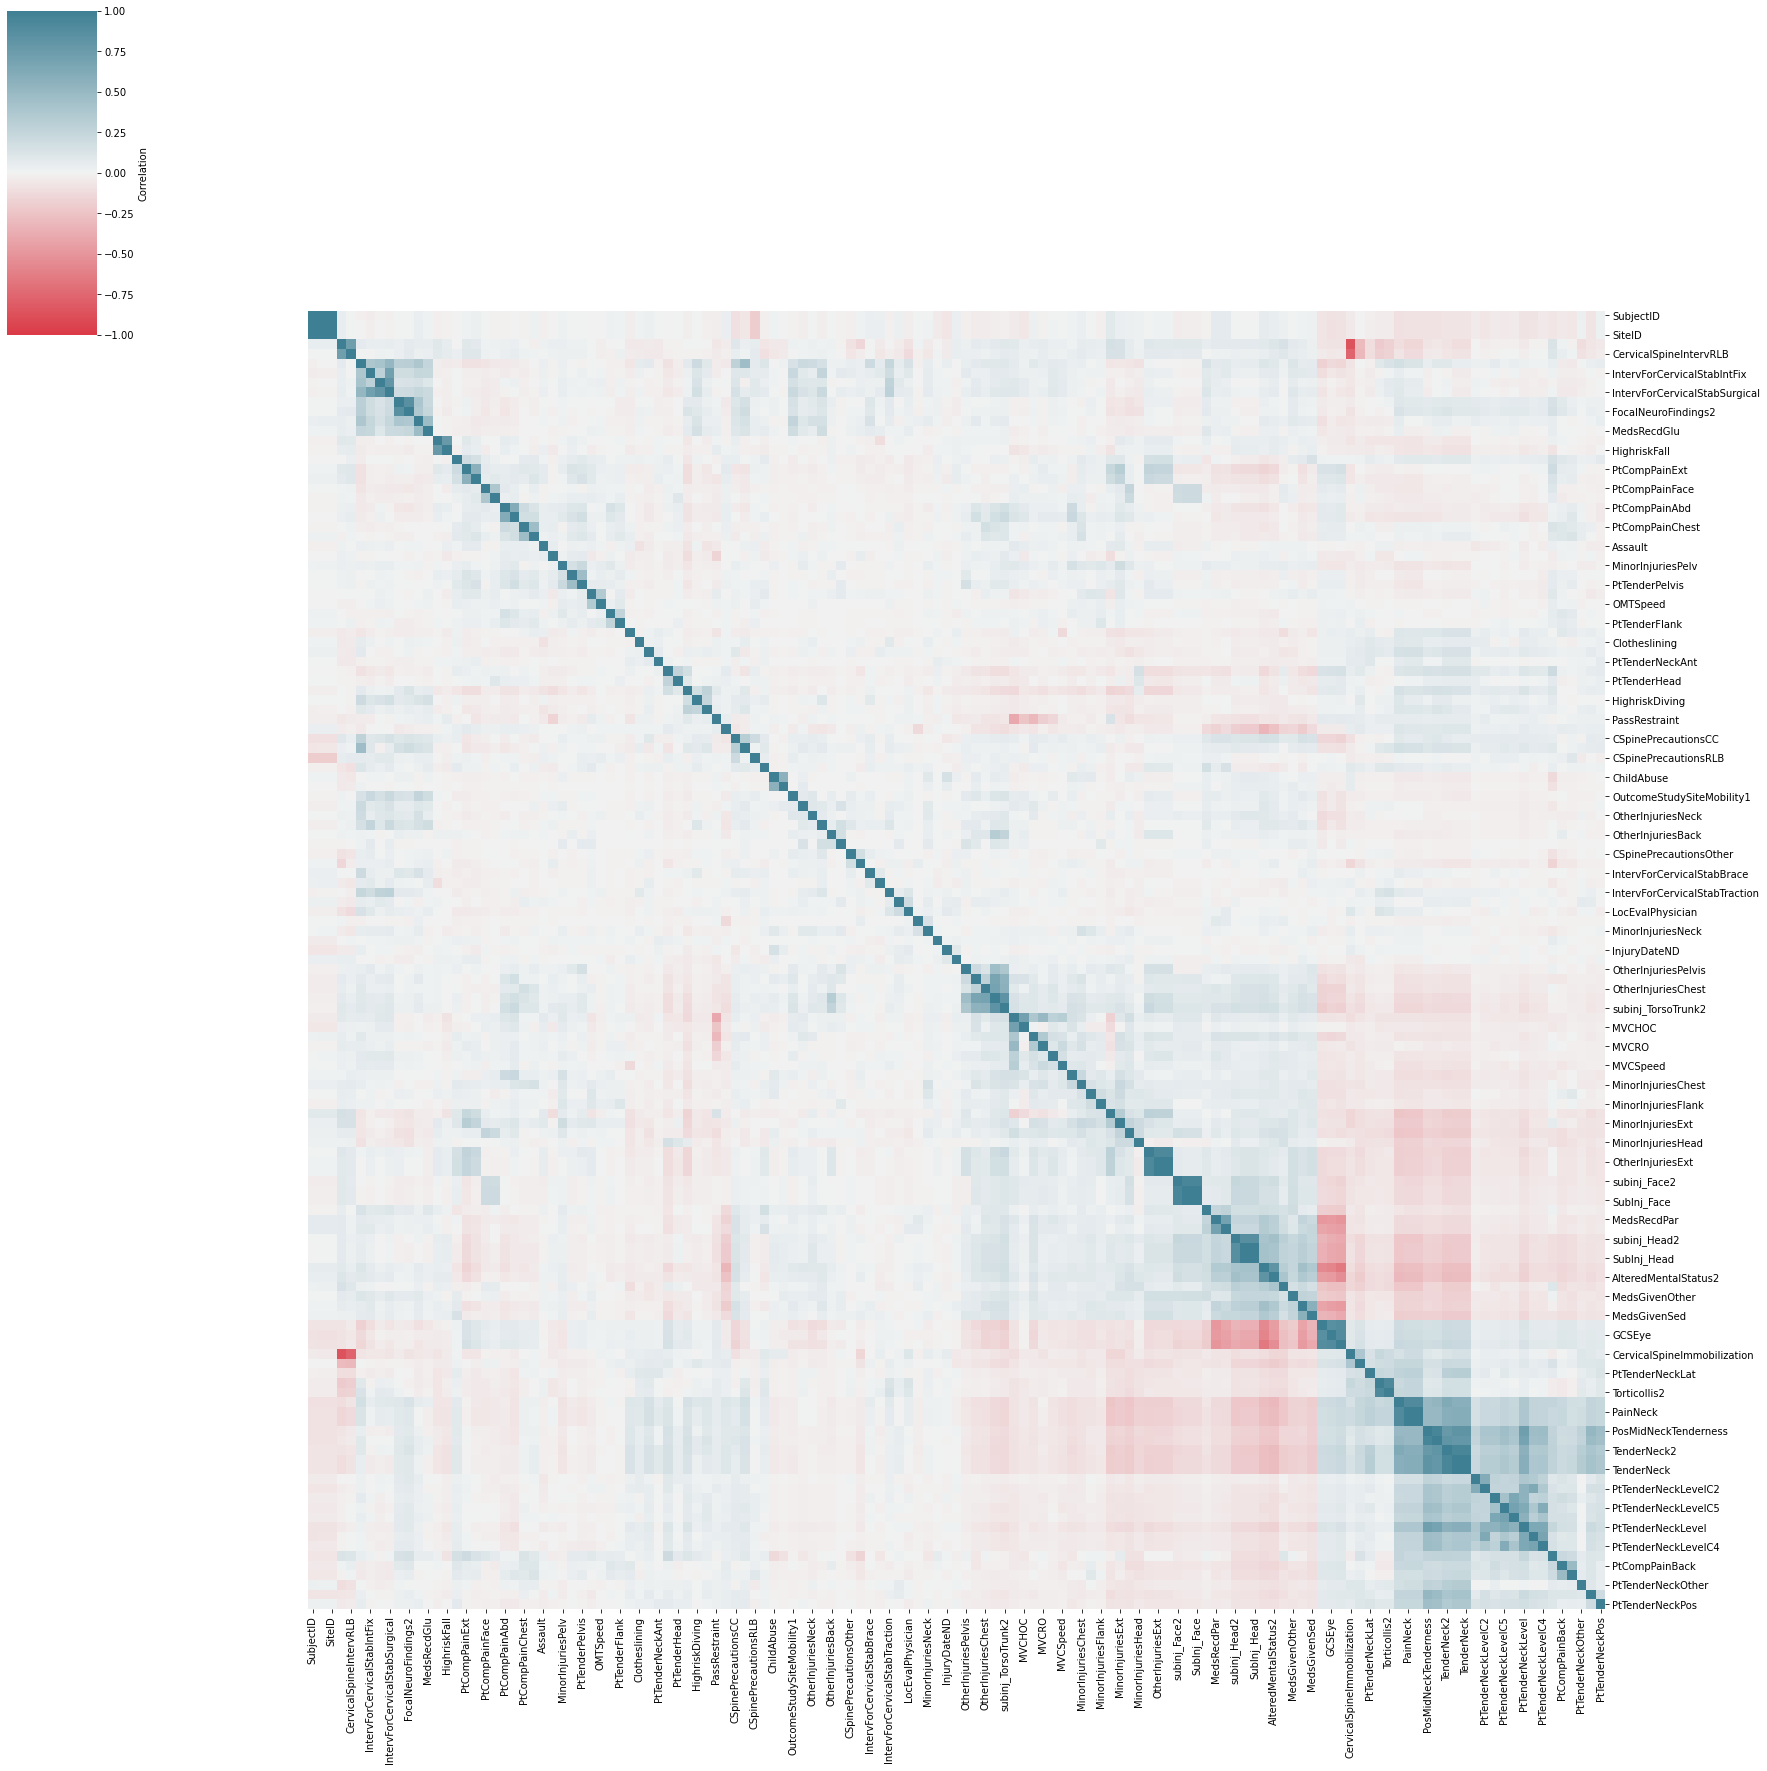

In [34]:
corrmap = sns.clustermap(corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'},
#                         yticklabels=True,
                         figsize=(25, 25))
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

### Variables to check for helper.py

In [43]:
temp = newdf.columns.tolist()
len(temp)
temp.extend(additional_valid_columns)
temp = sorted(temp)
# print(len(temp)) # 159
c = len(temp) // 3
print(len(temp), len(temp[:c]) + len(temp[c:2*c]) + len(temp[2*c:]), "\n-----")
print("Andy: ", temp[:c], "\n-----")
print("Licong: ", temp[c: 2*c], "\n-----")
print("SH: ", temp[2*c:], "\n-----")

159 159 
-----
Andy:  ['AVPU', 'AgeInYears', 'AlteredMentalStatus', 'AlteredMentalStatus2', 'ArrPtIntub', 'ArrivalTimeND', 'Assault', 'AxialLoadAnyDoc', 'CSpinePrecautionsCC', 'CSpinePrecautionsOther', 'CSpinePrecautionsRLB', 'CaseID', 'CervicalSpineImmobilization', 'CervicalSpineIntervCC', 'CervicalSpineIntervOther', 'CervicalSpineIntervRLB', 'ChildAbuse', 'Clotheslining', 'DxCspineInjury', 'Ethnicity', 'FallDownStairs', 'FallFromElevation', 'FocalNeuroFindings', 'FocalNeuroFindings2', 'GCSEye', 'Gender', 'HeadFirst', 'HeadFirstRegion', 'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'InjuryDateND', 'InjuryPrimaryMechanism', 'InjuryTimeND', 'IntervForCervicalStab', 'IntervForCervicalStabBrace', 'IntervForCervicalStabHalo', 'IntervForCervicalStabIntFix', 'IntervForCervicalStabOther', 'IntervForCervicalStabRCollar', 'IntervForCervicalStabSCollar', 'IntervForCervicalStabSurgical', 'IntervForCervicalStabTraction', 'LOC', 'LimitedR

In [36]:
var_sh = temp[2*c:]
print(var_sh)

['PtCompPainHead', 'PtCompPainNeck', 'PtCompPainNeckMove', 'PtCompPainPelvis', 'PtExtremityWeakness', 'PtParesthesias', 'PtSensoryLoss', 'PtTender', 'PtTenderAbd', 'PtTenderBack', 'PtTenderChest', 'PtTenderExt', 'PtTenderFace', 'PtTenderFlank', 'PtTenderHead', 'PtTenderNeck', 'PtTenderNeckAnt', 'PtTenderNeckLat', 'PtTenderNeckLevel', 'PtTenderNeckLevelC1', 'PtTenderNeckLevelC2', 'PtTenderNeckLevelC3', 'PtTenderNeckLevelC4', 'PtTenderNeckLevelC5', 'PtTenderNeckLevelC6', 'PtTenderNeckLevelC7', 'PtTenderNeckMid', 'PtTenderNeckOther', 'PtTenderNeckPos', 'PtTenderPelvis', 'ShakenBabySyndrome', 'SiteID', 'SubInj_Ext', 'SubInj_Face', 'SubInj_Head', 'SubInj_TorsoTrunk', 'SubjectID', 'TenderNeck', 'TenderNeck2', 'Torticollis', 'Torticollis2', 'TotalGCS', 'TotalGCSManual', 'VerbalGCS', 'ambulatory', 'axialloadtop', 'clotheslining', 'helmet', 'outcome', 'subinj_Ext2', 'subinj_Face2', 'subinj_Head2', 'subinj_TorsoTrunk2']


In [45]:
shdf = df[var_sh]
var_as = temp[:c]
asdf = df[var_as]
for col in asdf.columns:
    val = df[col].unique()
    print(f'{col:>20}', ":", f'{len(val):>2}', val)

                AVPU :  2 ['Y' 'N']
          AgeInYears : 1308 [15.71 15.94 14.53 ...  0.82  0.11  2.  ]
 AlteredMentalStatus :  3 [ 1.  0. nan]
AlteredMentalStatus2 :  3 [ 1.  0. nan]
          ArrPtIntub :  2 ['Y' 'N']
       ArrivalTimeND :  2 [0 1]
             Assault :  3 [nan  0.  1.]
     AxialLoadAnyDoc :  2 [0 1]
 CSpinePrecautionsCC :  2 [1 0]
CSpinePrecautionsOther :  2 [0 1]
CSpinePrecautionsRLB :  2 [0 1]
              CaseID : 540 [ 110001  110002  110003  110004  110005  110006  110007  110008  110009
  110010  110011  110012  110013  110014  110015  110016  110017  110018
  110019  110020  110021  110022  110023  110024  210149  210150  210151
  210152  210153  210154  210155  210156  210157  210158  210159  210160
  210161  210162  210163  210164  210165  210166  310270  310271  310272
  310273  310274  310275  310276  310277  310278  310279  310280  310281
  310282  310283  310284  310285  310286  310287  310288  310289  310290
  310291  310292  310293  310294  3102

In [38]:
GCS_threshold = 15
GCS_binary = {i:int(i>=GCS_threshold) for i in range(1, 16)}
print(GCS_binary)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1}


In [39]:
cols = df.columns.tolist()
first = ["SubjectID", "SiteID", "CaseID"]
cols = [c for c in cols if c not in first]
cols = first + cols
temp = df[cols]
temp

,SubjectID,SiteID,CaseID,AVPU,AVPUDetails,AVPUMental,AVPUMentaltxt,AVPUMentaltxtCat,AgeInYears,AlteredMentalStatus,...,ambulatory,axialloadtop,clotheslining,helmet,injurydate,subinj_Ext2,subinj_Face2,subinj_Head2,subinj_TorsoTrunk2,outcome
0,110001,1,110001,Y,U,NaN,NaN,NaN,15.71,1.0,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,1.0,1.0,1
1,110002,1,110002,Y,A,NaN,NaN,NaN,15.94,0.0,...,0.0,0,N,N,1/1/2000,0.0,0.0,0.0,0.0,1
2,110003,1,110003,Y,A,NaN,NaN,NaN,14.53,0.0,...,NaN,1,NaN,NaN,1/1/2000,0.0,0.0,0.0,0.0,1
3,110004,1,110004,Y,A,NaN,NaN,NaN,14.96,0.0,...,1.0,1,N,Y,12/28/1999,0.0,0.0,0.0,0.0,1
4,110005,1,110005,N,NaN,NaN,NaN,NaN,13.23,NaN,...,NaN,0,N,ND,12/30/1999,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,1743310,17,1713113,Y,A,NaN,NaN,NaN,2.97,0.0,...,NaN,0,NaN,NaN,1/1/2000,1.0,0.0,0.0,0.0,0
3310,1743311,17,1713132,Y,A,NaN,NaN,NaN,12.82,0.0,...,0.0,0,N,Y,1/1/2000,0.0,0.0,0.0,0.0,0
3311,1743312,17,1713122,Y,A,NaN,NaN,NaN,0.82,0.0,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,0.0,0.0,0
3312,1743313,17,1713105,Y,A,NaN,NaN,NaN,0.11,0.0,...,0.0,0,NaN,NaN,1/1/2000,0.0,0.0,1.0,0.0,0


## Here is the end of SH progress (11/22/2021)
***

In [ ]:
df_train, df_tune, _ = Dataset().get_data(load_csvs=True)
df = df_train
processed_feats = df.keys().values.tolist()
print(processed_feats)
print(len(processed_feats))

['AbdDistention_no', 'AbdDistention_or_AbdomenPain_no', 'AbdDistention_or_AbdomenPain_yes', 'AbdDistention_unknown', 'AbdDistention_yes', 'AbdTenderDegree_Mild', 'AbdTenderDegree_Moderate', 'AbdTenderDegree_None', 'AbdTenderDegree_Severe', 'AbdTenderDegree_unknown', 'AbdTrauma_no', 'AbdTrauma_or_SeatBeltSign_no', 'AbdTrauma_or_SeatBeltSign_yes', 'AbdTrauma_unknown', 'AbdTrauma_yes', 'AbdomenPain_no', 'AbdomenPain_unknown', 'AbdomenPain_yes', 'Age', 'Age<2_no', 'Age<2_yes', 'CostalTender_no', 'CostalTender_yes', 'DecrBreathSound_no', 'DecrBreathSound_unknown', 'DecrBreathSound_yes', 'DistractingPain_no', 'DistractingPain_unknown', 'DistractingPain_yes', 'GCSScore', 'GCSScore_Full_no', 'GCSScore_Full_yes', 'Hypotension_no', 'Hypotension_yes', 'LtCostalTender', 'MOI_Bike collision/fall', 'MOI_Fall down stairs', 'MOI_Fall from an elevation', 'MOI_Motor vehicle collision', 'MOI_Motorcycle/ATV/Scooter collision', 'MOI_Object struck abdomen', 'MOI_Pedestrian/bicyclist struck by moving vehicle

**correlations between features**

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

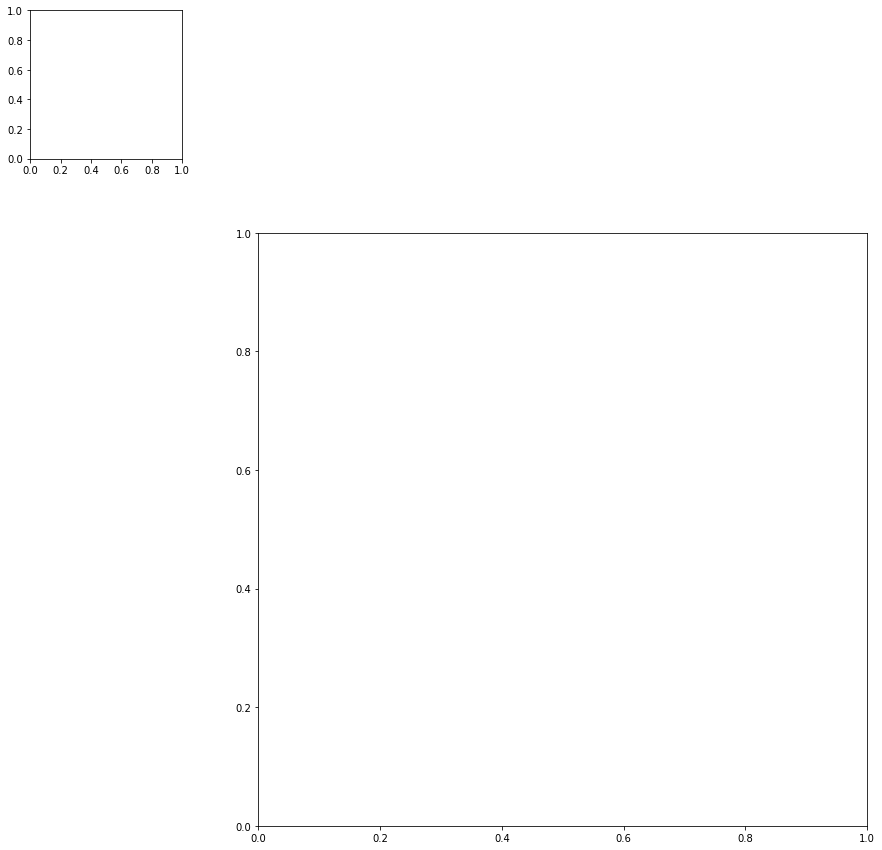

In [102]:
# corrs = df[feat_names + [outcome_def]].corr()
corrs = df[processed_feats].corr(method='pearson')
corrmap = sns.clustermap(corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'},
                         yticklabels=True,
                         figsize=(15, 15))
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

plt.show()
# plt.savefig('results/corrplot.png', dpi=300, bbox_inches='tight')

**individual correlations with outcome**

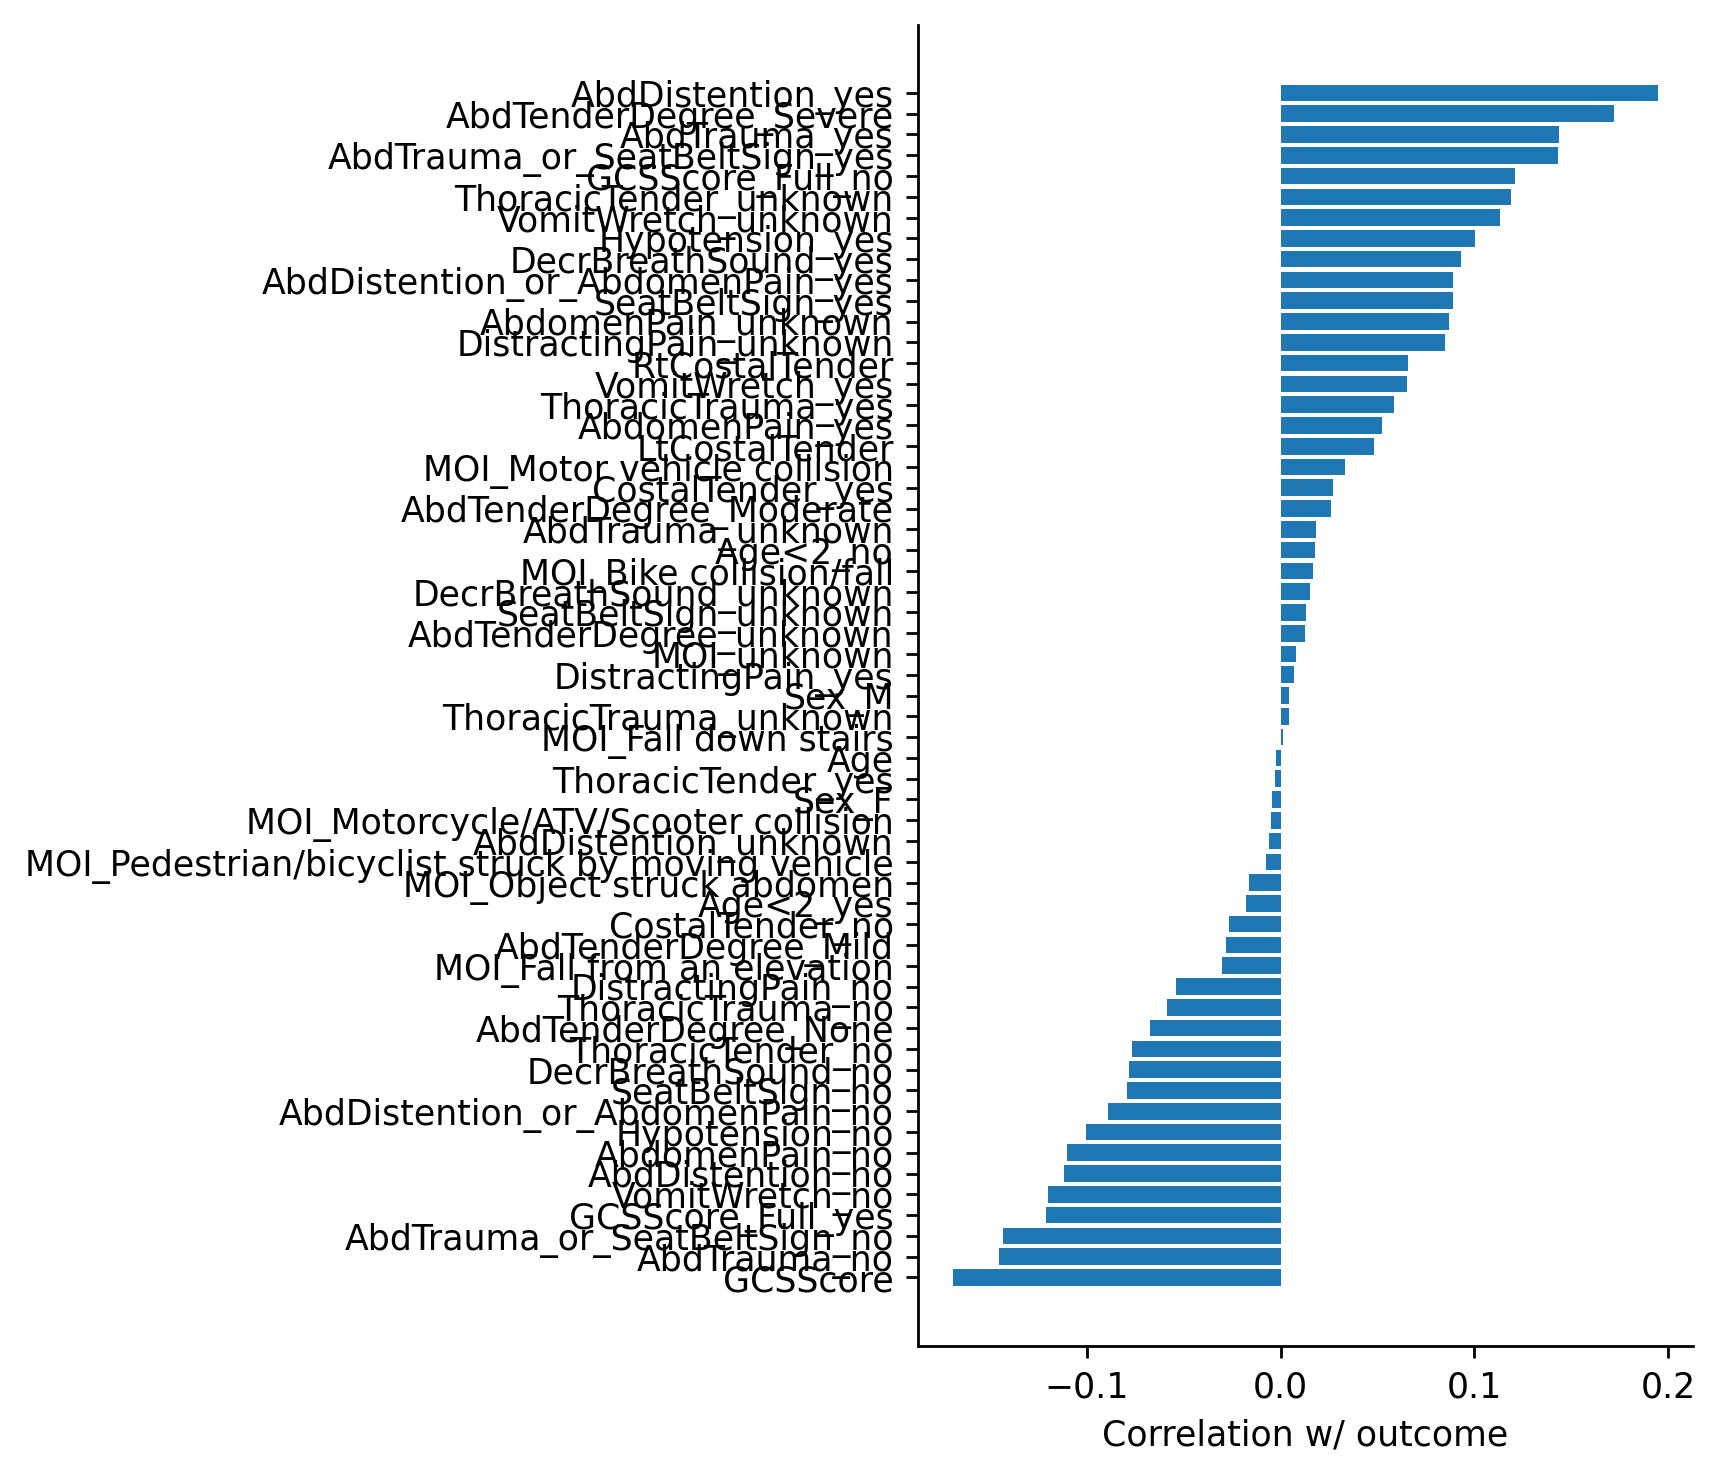

In [4]:
plt.figure(dpi=250, figsize=(4, 7))
vals = corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

**subgroup risks (with sizes)**

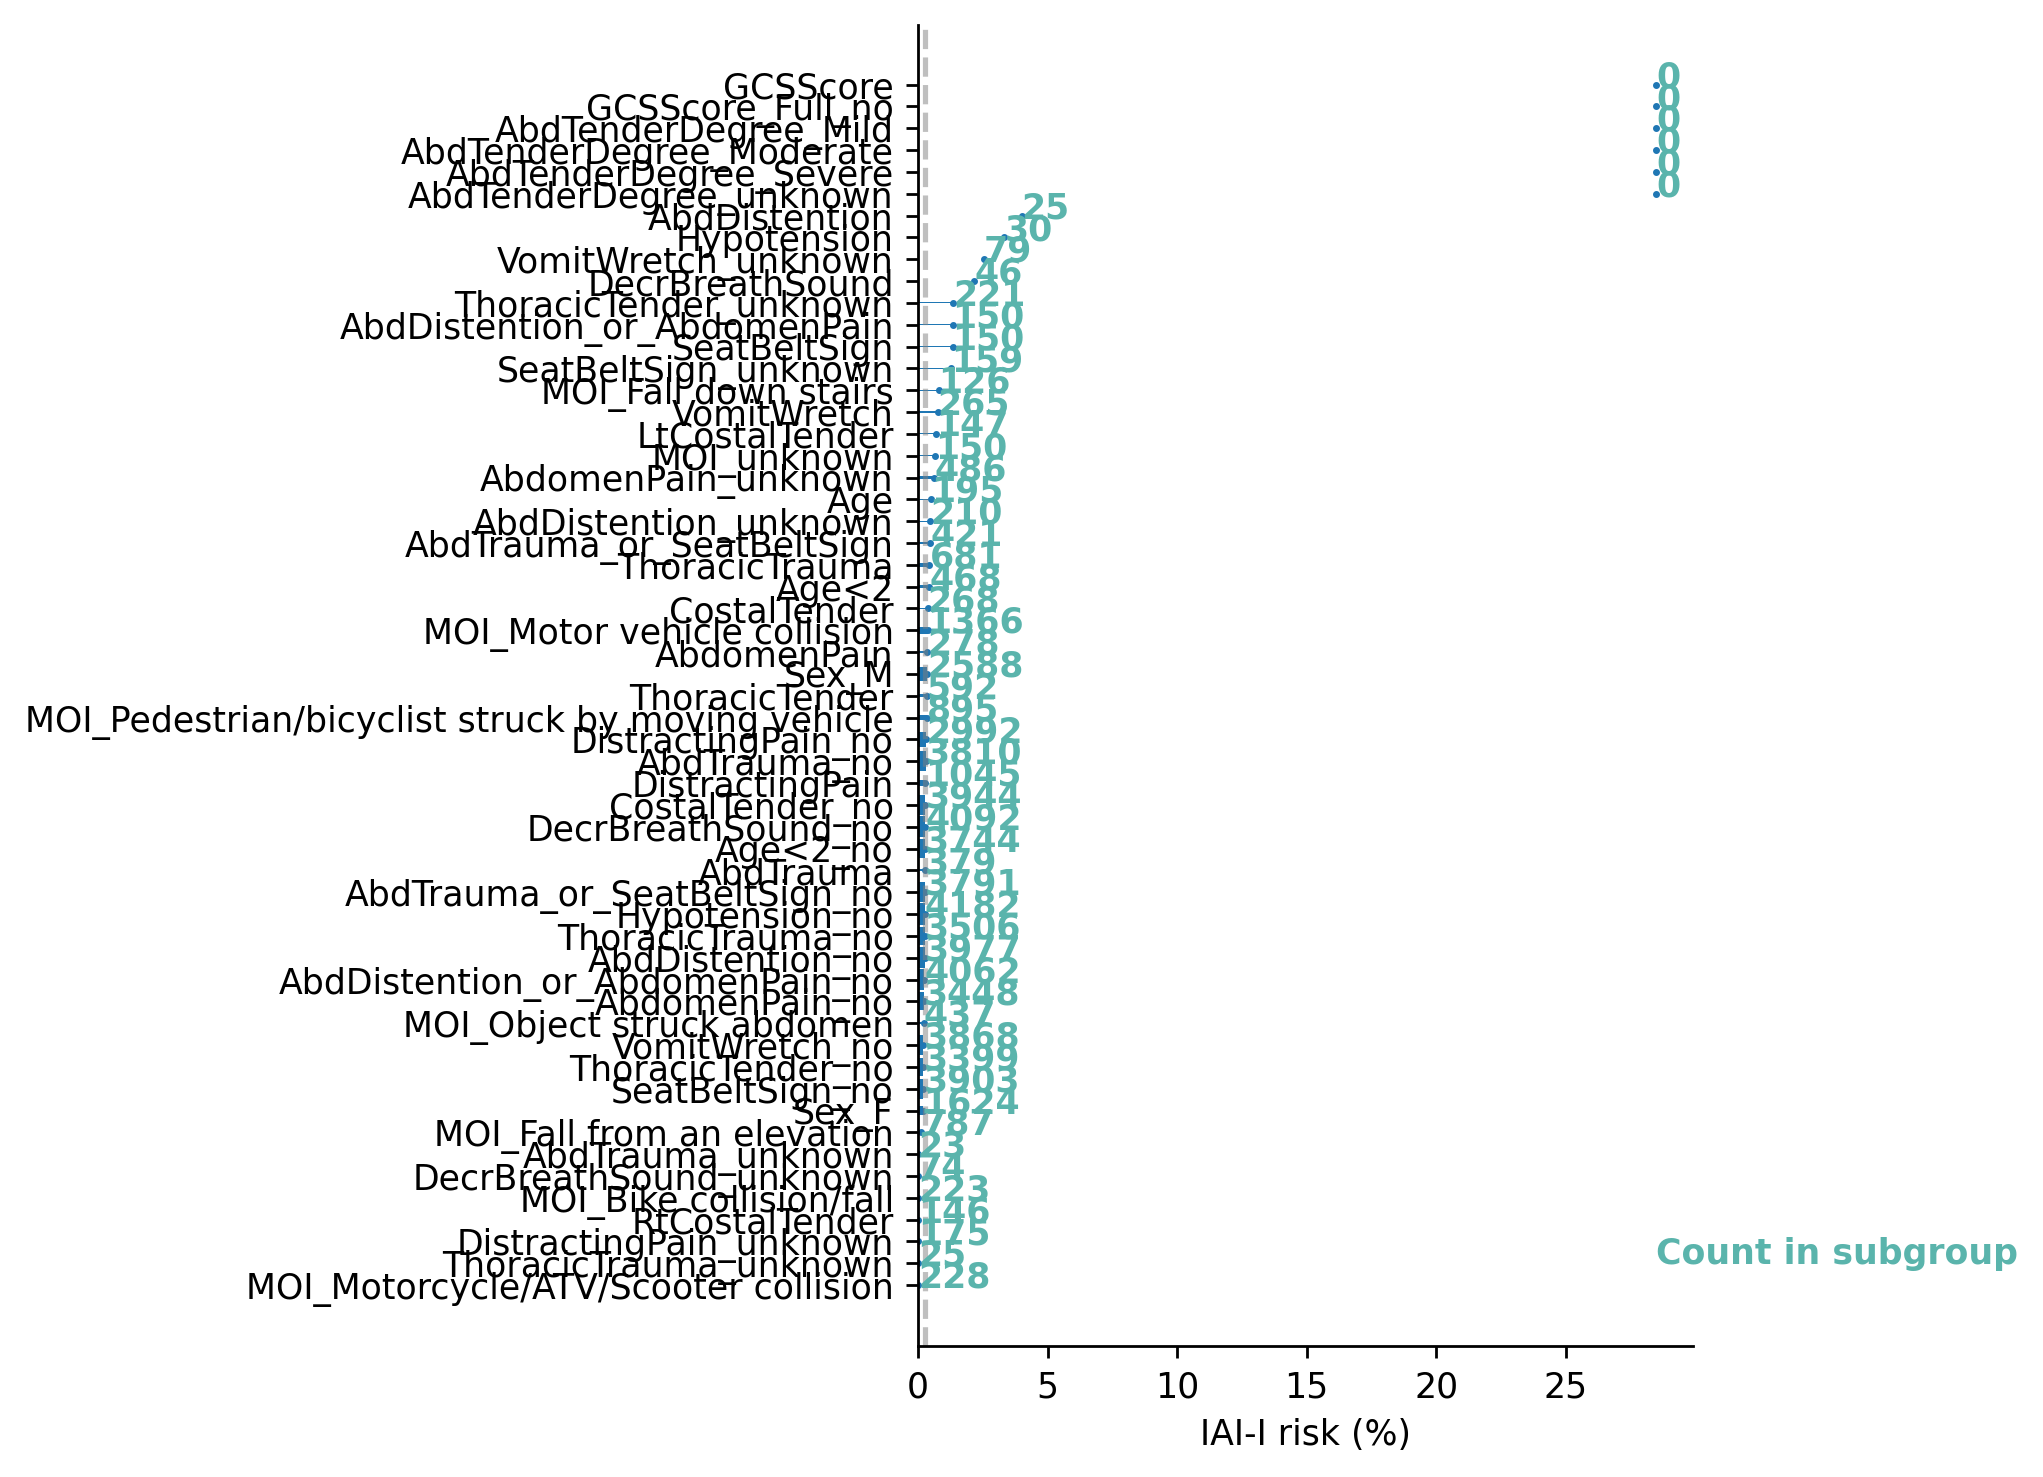

In [5]:
def plot_subgroup_risks(df, head=None, tail=None):
    plt.figure(dpi=250, figsize=(4, 7))
    ks = np.array([k for k in df.keys()
                   if not k == outcome_def])
    mean_risk_baseline = df[outcome_def].mean() * 100
    if head is not None or tail is not None:
        ks = np.array([k for k in ks
                       if np.sum(df[k]) >= 10
                       and np.abs(np.mean(df[k]) - mean_risk_baseline) > 1
                       and not np.sum([df[k] == 1]) == 0])  # should have at least one IAI-I
    vals = np.array([np.mean(df[outcome_def][df[k] == 1]) for k in ks])
    vals[np.isnan(vals)] = mean_risk_baseline
    counts = np.array([np.sum([df[k] == 1]) for k in ks])
    args = np.argsort(vals)
    if head is not None:
        args = args[:head]
    if tail is not None:
        args = args[-tail:]
    labs = ks[args]
    vals = vals[args] * 100
    counts = counts[args]
    counts_norm = counts / np.nanmax(counts)
    ax = plt.subplot(111)
    plt.plot(vals, np.arange(vals.size), 'o', ms=1)
    plt.barh(y=np.arange(vals.size), width=vals, height=1.0 * counts_norm)
    plt.yticks(np.arange(vals.size), [lab.replace('_yes', '') for lab in labs])
    for i, (v, c) in enumerate(zip(vals, counts)):
        ax.text(v, i - 0.1, str(c), color=viz.cg, fontweight='bold')
    plt.axvline(mean_risk_baseline, color='gray', linestyle='--', alpha=0.5)
    ax.text(vals.max(), 1, 'Count in subgroup', color=viz.cg, fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('IAI-I risk (%)')
    plt.show()


# plot_subgroup_risks(df[processed_feats + [outcome_def]])
# dd = df[(df['AbdTenderDegree_None']==1) & (df['GCSScore_Full_yes'] == 1)] # low-risk group left to split
# plot_subgroup_risks(dd[[k for k in processed_feats if not k in ['AbdTenderDegree_None', 'GCSScore_Full_yes']] + [outcome_def]])
dd = df[(df['AbdTenderDegree_None'] == 1) & (
            df['GCSScore_Full_yes'] == 1)]  # & (df['DecrBreathSound_yes'] == 0)] # low-risk group left to split
plot_subgroup_risks(dd[[k for k in processed_feats
                        if not k in ['AbdTenderDegree_None', 'GCSScore_Full_yes']]])

**joint correlations (or risks) with outcome joint**

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


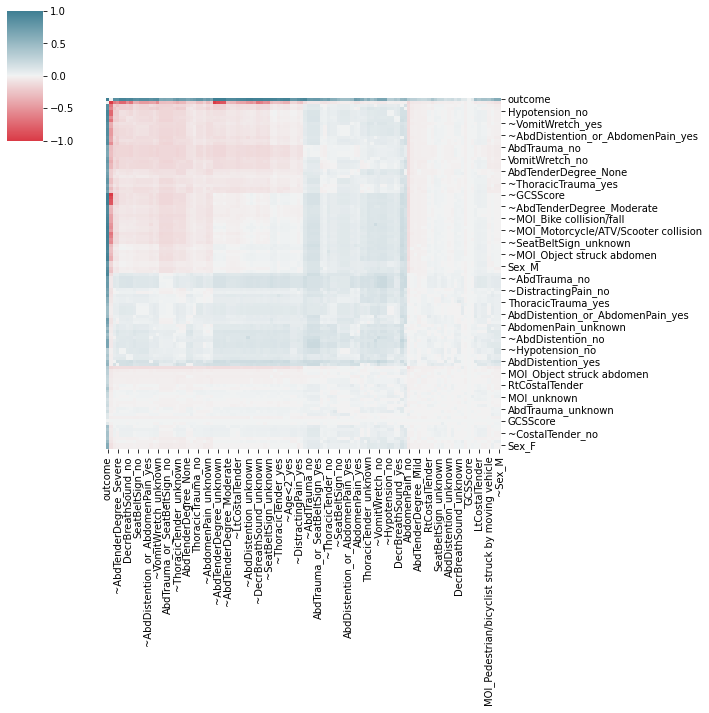

In [6]:
func = lambda x, y: np.corrcoef(x, y)[0, 1]  # corr
# func = lambda x, y: np.mean(y[x]) # frac high-risk
d = len(processed_feats)
mat = np.zeros((2 * d, 2 * d))
y = df[outcome_def]
for r in range(d):
    for c in range(d):
        xr = df[processed_feats[r]] == 1
        xc = df[processed_feats[c]] == 1
        mat[2 * r, 2 * c] = func(xr & xc, y)
        mat[2 * r + 1, 2 * c] = func(~xr & xc, y)
        mat[2 * r, 2 * c + 1] = func(xr & ~xc, y)
        mat[2 * r + 1, 2 * c + 1] = func(~xr & ~xc, y)

fs = np.array([[x, '~' + x] for x in processed_feats]).flatten()
mat[np.isnan(mat)] = 0
matt = pd.DataFrame(mat, index=fs, columns=fs)
vabs = np.max([np.abs(np.min(mat)), np.max(mat)])
vmin = -vabs
cmap = viz.cmap_div
if np.min(mat) >= 0:
    vmin = 0
    cmap = 'Blues'
corrmap = sns.clustermap(matt, cmap=cmap, vmin=vmin, vmax=vabs,
                         dendrogram_ratio=0.2, figsize=(10, 10), )
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
#                row_cluster=False, col_cluster=False)
# plt.savefig('dendrogram.png', dpi=400)
# plt.tight_layout()
plt.show()

## continuous features

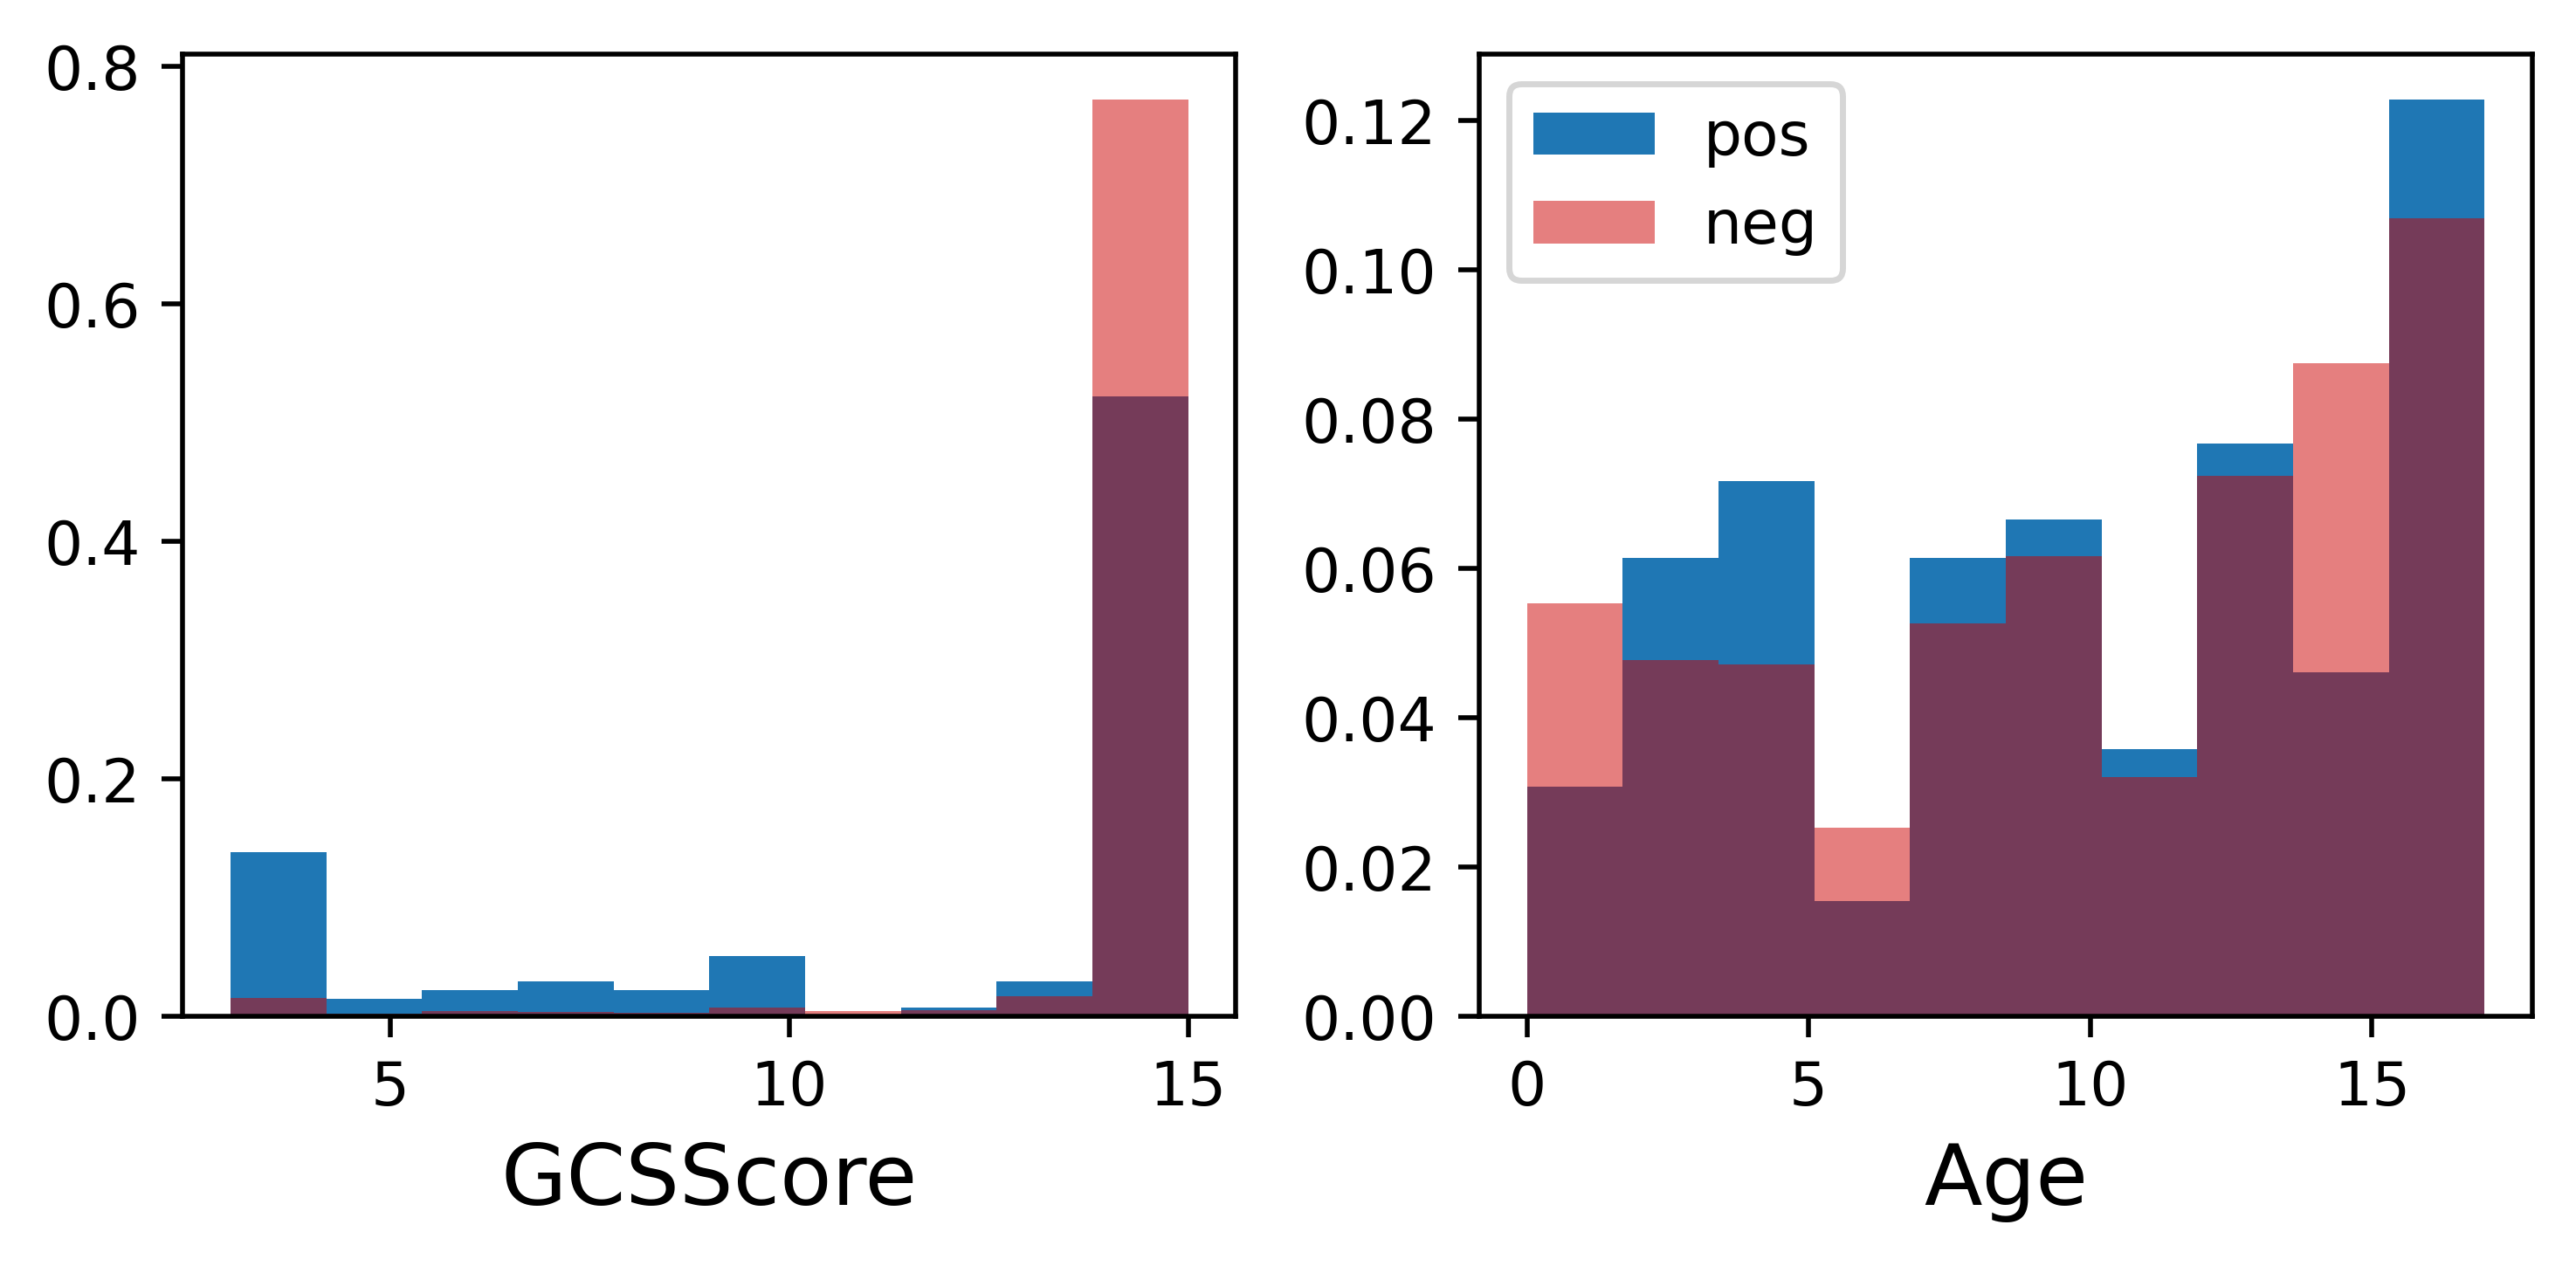

In [7]:
feats_numerical = ['GCSScore', 'Age']
# feats_categorical = ['AbdTenderDegree', 'Race', 'MOI']
R, C, = 1, 2
plt.figure(figsize=(6, 3), dpi=500)
for i in range(len(feats_numerical)):
    plt.subplot(R, C, i + 1)
    feat = feats_numerical[i]
    plt.hist(df[df[outcome_def] == 1][feat], density=True, alpha=1, label='pos', color=viz.cb)
    plt.hist(df[df[outcome_def] == 0][feat], density=True, alpha=0.5, label='neg', color=viz.cr)
    plt.xlabel(feat, fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**we can cut GCSScore as whether it is 15 or not (14 is already pretty bad)**

In [8]:
feat = 'GCSScore'
print(np.unique(df[df[outcome_def] == 1][feat], return_counts=True))
print(np.unique(df[df[outcome_def] == 0][feat], return_counts=True))

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 13., 14., 15.]), array([18,  1,  2,  3,  4,  3,  3,  4,  1,  4,  9, 63]))
(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]), array([ 119,   13,   16,   36,   31,   23,   35,   27,   37,   41,  145,
        372, 6216]))


## scatter plots

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributio

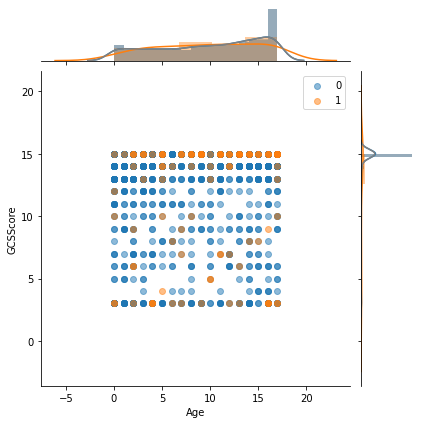

In [9]:
viz.jointplot_grouped('Age', 'GCSScore', 'outcome', df)

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/sh-trial/trial-env/lib/python3.8/site-packages/seaborn/distributio

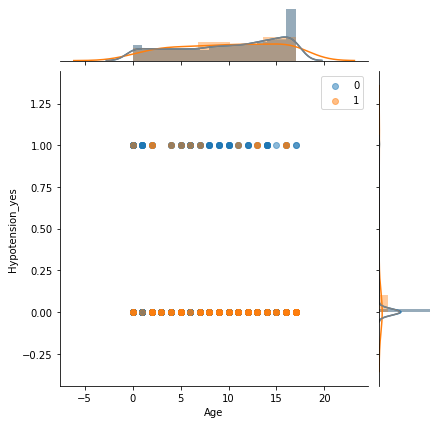

In [10]:
viz.jointplot_grouped('Age', 'Hypotension_yes', 'outcome', df)